In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
import matplotlib.pyplot as plt

In [3]:
salary_train= pd.read_csv('SalaryData_Train.csv')

In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


<AxesSubplot:>

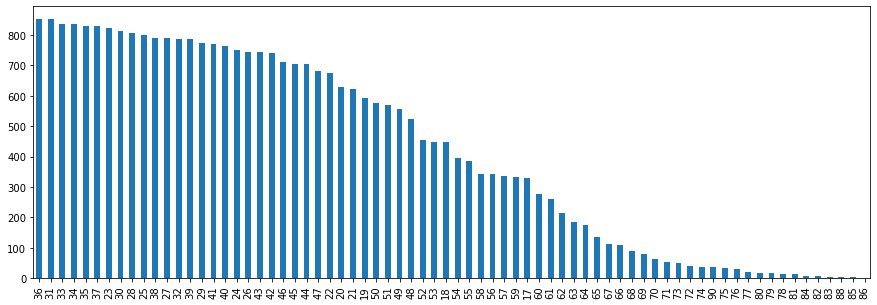

In [24]:
plt.figure(figsize=(15,5))
salary_train.age.value_counts().plot.bar()

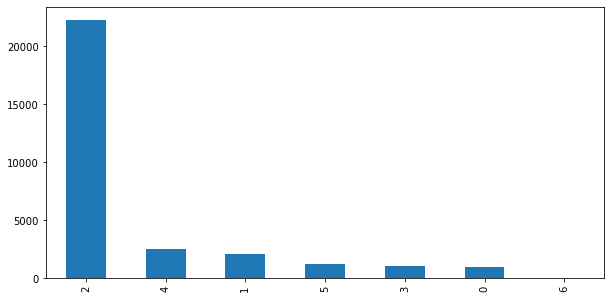

In [26]:
plt.figure(figsize=(10,5))
salary_train.workclass.value_counts().plot.bar();

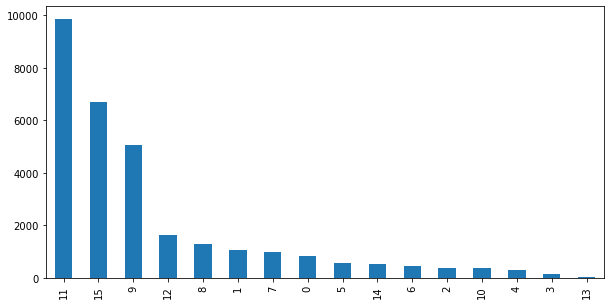

In [28]:
plt.figure(figsize=(10,5))
salary_train.education.value_counts().plot.bar();

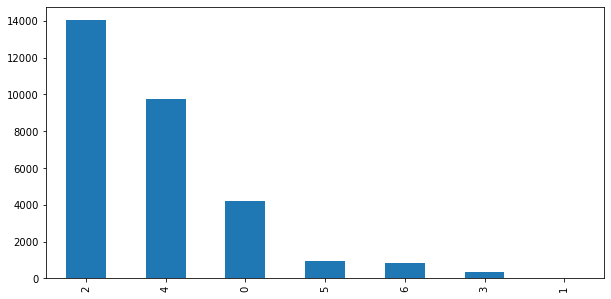

In [29]:
plt.figure(figsize=(10,5))
salary_train.maritalstatus.value_counts().plot.bar();

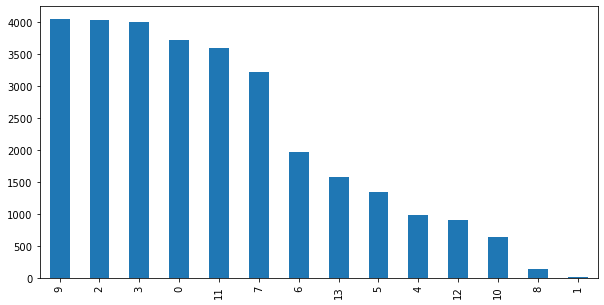

In [30]:
plt.figure(figsize=(10,5))
salary_train.occupation.value_counts().plot.bar();

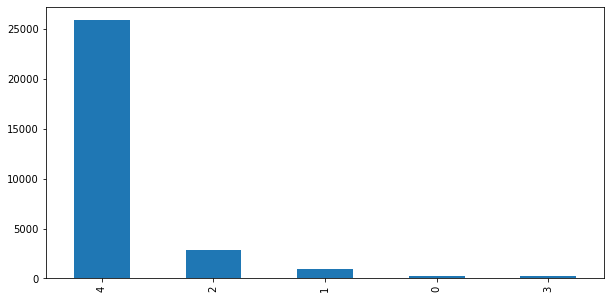

In [31]:
plt.figure(figsize=(10,5))
salary_train.race.value_counts().plot.bar();

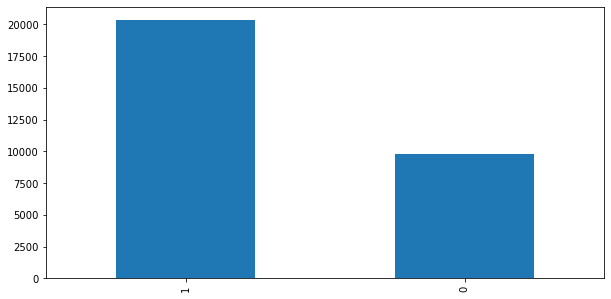

In [32]:
plt.figure(figsize=(10,5))
salary_train.sex.value_counts().plot.bar();

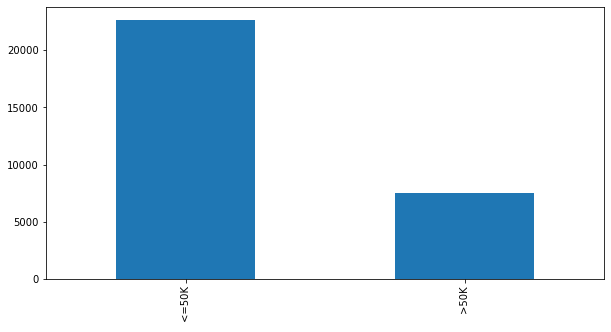

In [33]:
plt.figure(figsize=(10,5))
salary_train.Salary.value_counts().plot.bar();

In [6]:
salary_test= pd.read_csv('SalaryData_Test.csv')

In [7]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

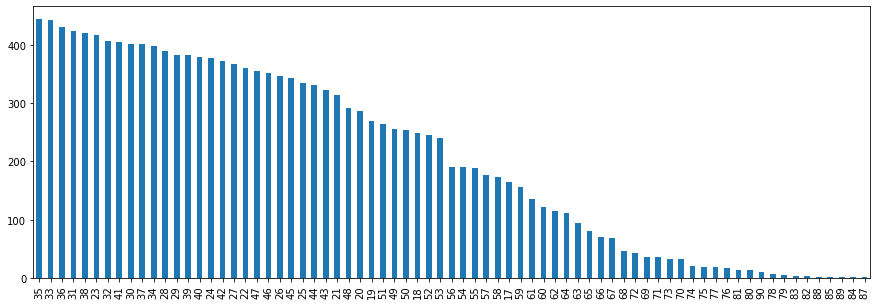

In [34]:
plt.figure(figsize=(15,5))
salary_test.age.value_counts().plot.bar()

<AxesSubplot:>

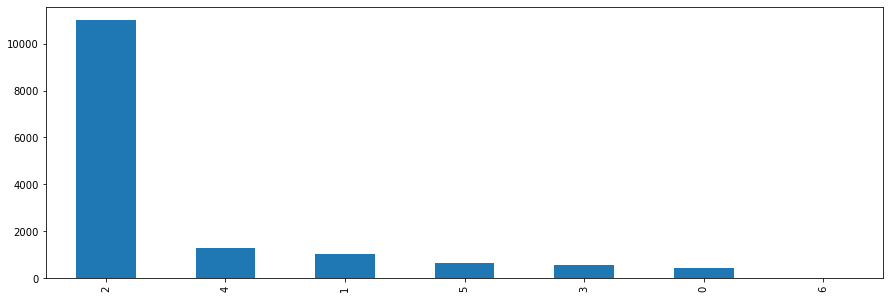

In [35]:
plt.figure(figsize=(15,5))
salary_test.workclass.value_counts().plot.bar()

<AxesSubplot:>

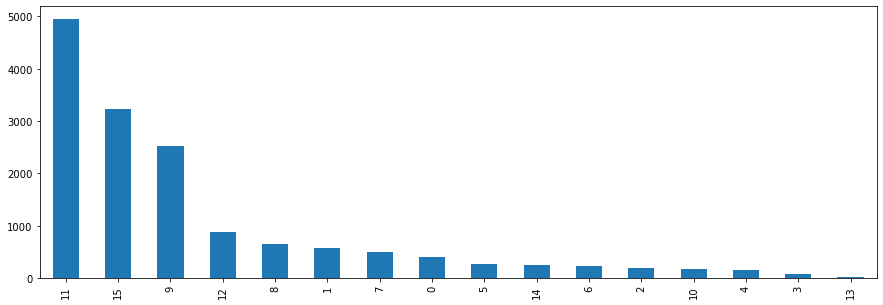

In [36]:
plt.figure(figsize=(15,5))
salary_test.education.value_counts().plot.bar()

<AxesSubplot:>

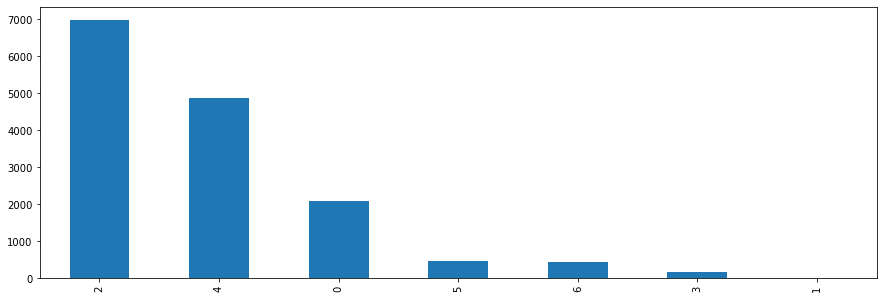

In [37]:
plt.figure(figsize=(15,5))
salary_test.maritalstatus.value_counts().plot.bar()

<AxesSubplot:>

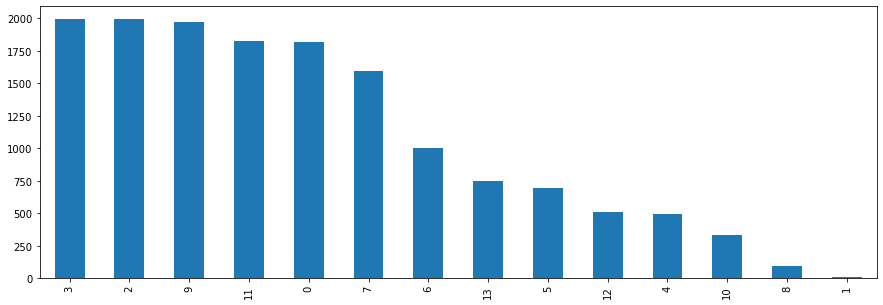

In [38]:
plt.figure(figsize=(15,5))
salary_test.occupation.value_counts().plot.bar()

<AxesSubplot:>

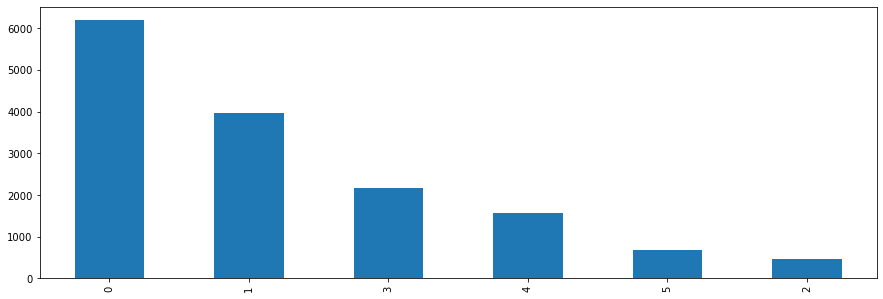

In [39]:
plt.figure(figsize=(15,5))
salary_test.relationship.value_counts().plot.bar()

<AxesSubplot:>

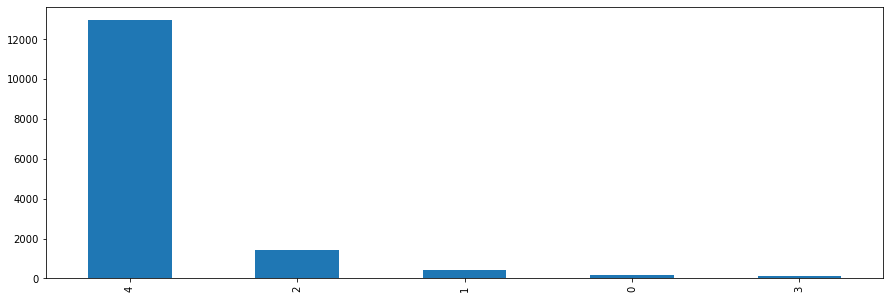

In [40]:
plt.figure(figsize=(15,5))
salary_test.race.value_counts().plot.bar()

<AxesSubplot:>

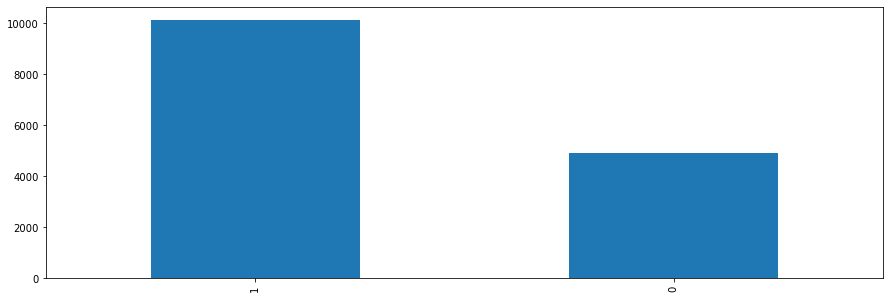

In [41]:
plt.figure(figsize=(15,5))
salary_test.sex.value_counts().plot.bar()

<AxesSubplot:>

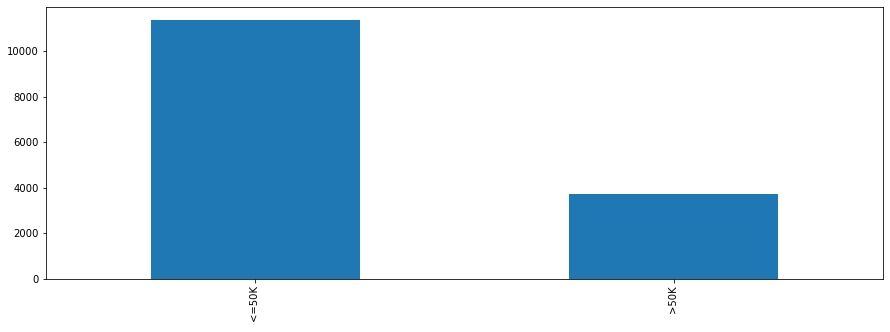

In [44]:
plt.figure(figsize=(15,5))
salary_test.Salary.value_counts().plot.bar()

In [9]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [10]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()

In [11]:
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

In [13]:
colnames = salary_train.columns

In [14]:
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
len(colnames[0:13])

13

In [16]:
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

In [17]:
sgnb = GaussianNB()
smnb = MultinomialNB()

In [18]:
spred_gnb = sgnb.fit(trainX,trainY).predict(testX)

In [19]:
confusion_matrix(testY,spred_gnb)

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

In [20]:
print ("Accuracy",(10759+1209)/(10759+601+2491+1209))

Accuracy 0.7946879150066402


In [21]:
spred_mnb = smnb.fit(trainX,trainY).predict(testX)
confusion_matrix(testY,spred_mnb)
print("Accuracy",(10891+780)/(10891+780+2920+780)) 

Accuracy 0.7592869689675362
